In [2]:
#Se borra todo lo que se encuentra en el entorno
rm(list=ls())

In [3]:
#Timeout y repositorio
options(timeout = 600)                    #10 minutos
options(repos = c(CRAN = 'https://cran.rstudio.com/')) #repositorio para no tener problemas al instalar paquetes
Sys.setlocale("LC_ALL", "es_MX.UTF-8")
#Instalar paquetería necewsaria para trabajar con fuentes
install.packages(c('sysfonts', 'showtext'))

[1] "LC_COLLATE=es_MX.UTF-8;LC_CTYPE=es_MX.UTF-8;LC_MONETARY=es_MX.UTF-8;LC_NUMERIC=C;LC_TIME=es_MX.UTF-8"

Installing packages into 'C:/Users/JUD de Visualización/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'sysfonts' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'sysfonts'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\JUD de Visualización\AppData\Local\R\win-library\4.5\00LOCK\sysfonts\libs\x64\sysfonts.dll  a C:\Users\JUD de Visualización\AppData\Local\R\win-library\4.5\sysfonts\libs\x64\sysfonts.dll: Permission denied"
Warning message:
"restored 'sysfonts'"


package 'showtext' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'showtext'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\JUD de Visualización\AppData\Local\R\win-library\4.5\00LOCK\showtext\libs\x64\showtext.dll  a C:\Users\JUD de Visualización\AppData\Local\R\win-library\4.5\showtext\libs\x64\showtext.dll: Permission denied"
Warning message:
"restored 'showtext'"



The downloaded binary packages are in
	C:\Users\JUD de Visualización\AppData\Local\Temp\RtmpYjUq2F\downloaded_packages


In [4]:
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse, ggplot2, janitor, srvyr, sysfonts, showtext)

Cargando paquete requerido: pacman



Dataframe Ejemplo

In [5]:
# Dataframe de ejemplo CORREGIDO
set.seed(123)
df_final <- data.frame(
  ciclo = 2022:2045,

  # Observado hasta 2024 (histórico)
  Deseable = c(
    22.20, 22.53, 22.87,  # 2022-2024 
    seq(22.87, 40.00, length.out = 21)  # 2024-2045: Deseable = MEDIO
  ),

  # Inercial: el MENOR
  Inercial = c(
    rep(NA, 3),  # No existe antes de 2024
    seq(22.87, 36.78, length.out = 21)  # 2024-2045: MÁS BAJO
  ),

  # Transformador: el MAYOR
  Transformador = c(
    rep(NA, 3),  # No existe antes de 2024
    seq(22.87, 43.50, length.out = 21)  # 2024-2045: MÁS ALTO
  )
)

# Asegurar que 2024 sea el mismo valor en los tres escenarios
df_final$Deseable[df_final$ciclo == 2024] <- 22.87
df_final$Inercial[df_final$ciclo == 2024] <- 22.87
df_final$Transformador[df_final$ciclo == 2024] <- 22.87

# Redondear a 2 decimales
df_final[, -1] <- round(df_final[, -1], 2)

# Ver resultado
df_final


ciclo,Deseable,Inercial,Transformador
<int>,<dbl>,<dbl>,<dbl>
2022,22.20,NA,NA
2023,22.53,NA,NA
2024,22.87,22.87,22.87
2025,22.87,22.87,22.87
2026,23.73,23.57,23.90
2027,24.58,24.26,24.93
2028,25.44,24.96,25.96
2029,26.30,25.65,27.00
2030,27.15,26.35,28.03


In [6]:
#Parámetros

#Año base
ano_base <- 2024

#Agregar fuente Roboto
font_add_google('Roboto', 'roboto')
showtext_auto()

#Tema para el gráfico
theme_set(theme_minimal(base_family = 'roboto', base_size = 10))
theme_update(
  axis.title = element_text(size = 12),
  plot.title = element_text(size = 14, hjust = 0.5, face = 'bold'),
  axis.text = element_text(size = 10),
  legend.text = element_text(size = 10),
  legend.title = element_text(size = 12))


In [19]:
#El dataframe debe contener las columnas: ciclo, Deseable, Inercial, Transformador

obs <- df_final %>% #observado
filter(ciclo <= ano_base)

fut <- df_final %>% #escenarios futuros
filter(ciclo >= ano_base)


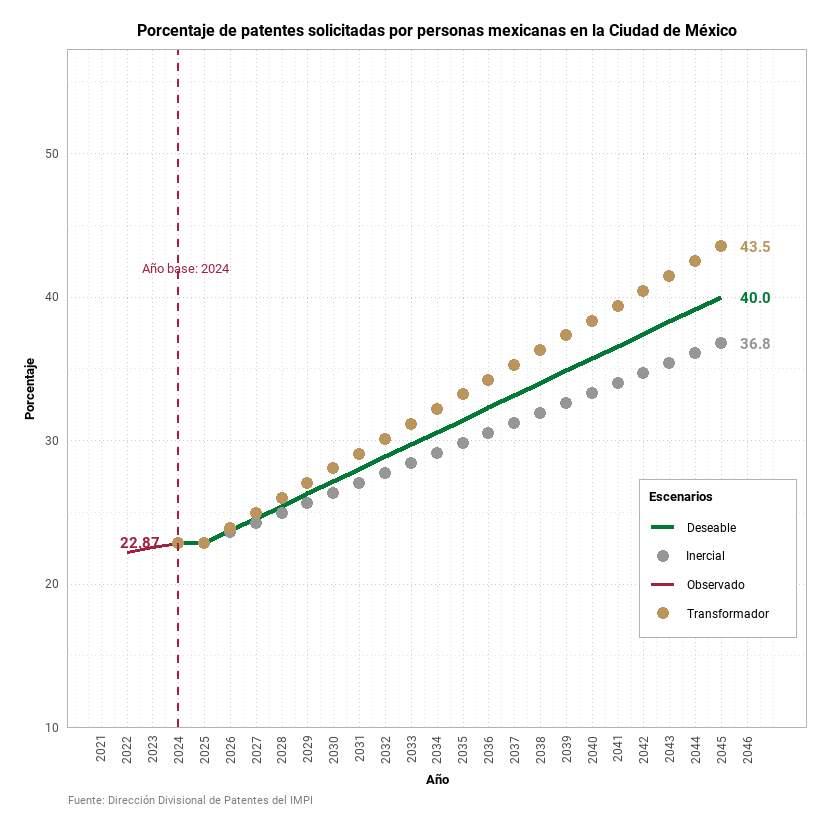

In [17]:
p <- ggplot() +
  
  # Observado
  geom_line(data = obs, aes(x = ciclo, y = Deseable, color = "Observado"), linewidth = 1.1) +
  
  # Deseable
  geom_line(data = fut, aes(x = ciclo, y = Deseable, color = "Deseable"), linewidth = 1.25) +
  
  # Escenarios futuros
  geom_point(data = fut, aes(x = ciclo, y = Inercial, color = "Inercial"), size = 3) +
  geom_point(data = fut, aes(x = ciclo, y = Transformador, color = "Transformador"), size = 3) +
  
  # Línea vertical del año base
  geom_vline(xintercept = ano_base, color = "#9F2241", linetype = "dashed", linewidth = 0.7) +
  annotate("text", x = ano_base + 0.3, y = max(df_final$Deseable) * 1.05,
           label = paste("Año base:", ano_base),
           color = "#9F2241", size = 3.3, family = "roboto") +
  
  # Etiqueta base
  annotate("text", x = ano_base - 1.5, y = df_final$Deseable[df_final$ciclo == ano_base],
           label = sprintf("%.2f", df_final$Deseable[df_final$ciclo == ano_base]),
           color = "#9F2241", size = 4, fontface = "bold", family = "roboto") +
  
  # Etiquetas finales flotantes
  annotate("text", x = 2046.3, y = df_final$Deseable[df_final$ciclo == 2045],
           label = sprintf("%.1f", df_final$Deseable[df_final$ciclo == 2045]),
           color = "#027a35", size = 4, fontface = "bold", family = "roboto") +
  annotate("text", x = 2046.3, y = df_final$Inercial[df_final$ciclo == 2045],
           label = sprintf("%.1f", df_final$Inercial[df_final$ciclo == 2045]),
           color = "#969696", size = 4, fontface = "bold", family = "roboto") +
  annotate("text", x = 2046.3, y = df_final$Transformador[df_final$ciclo == 2045],
           label = sprintf("%.1f", df_final$Transformador[df_final$ciclo == 2045]),
           color = "#BC955C", size = 4, fontface = "bold", family = "roboto") +
  
  # Títulos y ejes
  labs(
    title = "Porcentaje de patentes solicitadas por personas mexicanas en la Ciudad de México",
    x = "Año",
    y = "Porcentaje",
    color = "Escenarios",
    caption = "Fuente: Dirección Divisional de Patentes del IMPI"
  ) +
  
  # Escalas
  scale_y_continuous(limits = c(10, 55), expand = expansion(mult = c(0, 0.05))) +
  scale_x_continuous(breaks = seq(2021, 2046, 1), limits = c(2021, 2047)) +
  
  # Colores
  scale_color_manual(values = c(
    "Observado" = "#9F2241",
    "Deseable" = "#027a35",
    "Inercial" = "#969696",
    "Transformador" = "#BC955C"
  )) +
  
  # Tema con cuadrícula más visible
  theme_minimal(base_family = "roboto") +
  theme(
    plot.title = element_text(face = "bold", size = 12, hjust = 0.5),
    axis.title = element_text(size = 10, face = "bold"),
    axis.text = element_text(size = 9),
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
    
    # 🔹 Aquí el cambio principal: cuadrícula más visible
    panel.grid.major = element_line(color = "gray80", linetype = "dotted", linewidth = 0.5),
    panel.grid.minor = element_line(color = "gray90", linetype = "dotted", linewidth = 0.3),
    
    # Resto del formato
    plot.caption = element_text(hjust = 0, size = 8, color = "gray50"),
    legend.title = element_text(face = "bold", size = 10),
    legend.text = element_text(size = 9),
    legend.position = c(0.88, 0.25),
    legend.background = element_rect(fill = "white", color = "gray70", size = 0.3),
    legend.key = element_rect(fill = "white", color = NA),
    panel.border = element_rect(color = "gray70", fill = NA, linewidth = 0.5),  # contorno
    plot.margin = margin(15, 20, 20, 15)
  )

# --- GUARDAR ---
ggsave(
  "grafica_patentes_cuadricula_visible.png",
  plot = p,
  width = 11, height = 8, dpi = 300, bg = "white"
)

print(p)


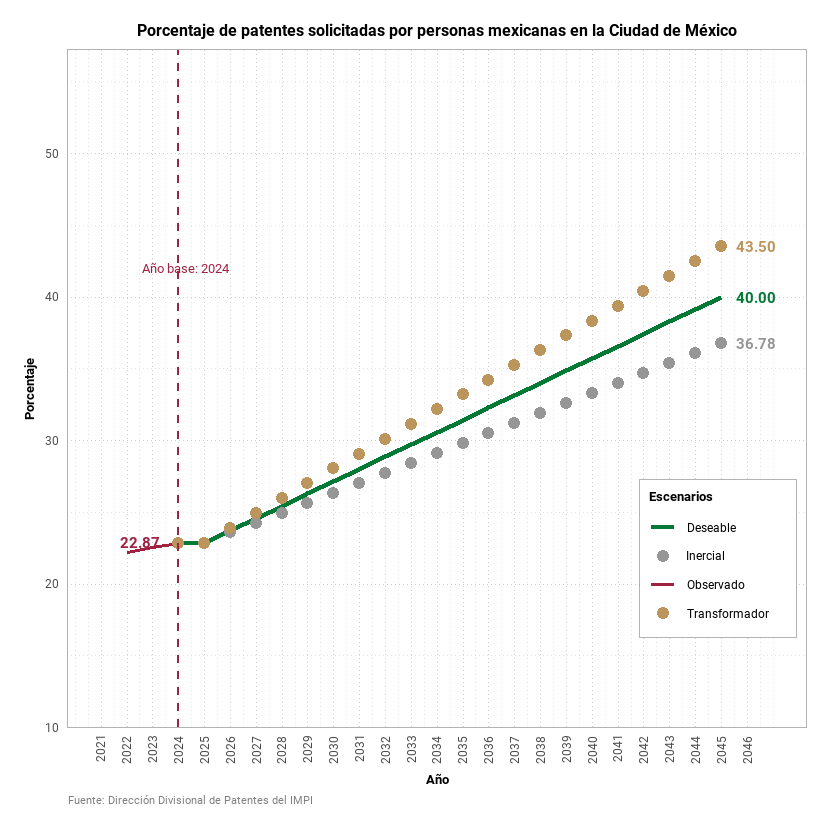

In [20]:
p <- ggplot() +
  
  # Observado
  geom_line(data = obs, aes(x = ciclo, y = Deseable, color = "Observado"), linewidth = 1.1) +
  
  # Deseable
  geom_line(data = fut, aes(x = ciclo, y = Deseable, color = "Deseable"), linewidth = 1.25) +
  
  # Escenarios futuros
  geom_point(data = fut, aes(x = ciclo, y = Inercial, color = "Inercial"), size = 3) +
  geom_point(data = fut, aes(x = ciclo, y = Transformador, color = "Transformador"), size = 3) +
  
  # Línea vertical del año base
  geom_vline(xintercept = ano_base, color = "#9F2241", linetype = "dashed", linewidth = 0.7) +
  annotate("text", x = ano_base + 0.3, y = max(df_final$Deseable) * 1.05,
           label = paste("Año base:", ano_base),
           color = "#9F2241", size = 3.3, family = "roboto") +
  
  # Etiqueta base
  annotate("text", x = ano_base - 1.5, y = df_final$Deseable[df_final$ciclo == ano_base],
           label = sprintf("%.2f", df_final$Deseable[df_final$ciclo == ano_base]),
           color = "#9F2241", size = 4, fontface = "bold", family = "roboto") +
  
  # Etiquetas finales flotantes (🔹 ahora con dos decimales)
  annotate("text", x = 2046.3, y = df_final$Deseable[df_final$ciclo == 2045],
           label = sprintf("%.2f", df_final$Deseable[df_final$ciclo == 2045]),
           color = "#027a35", size = 4, fontface = "bold", family = "roboto") +
  annotate("text", x = 2046.3, y = df_final$Inercial[df_final$ciclo == 2045],
           label = sprintf("%.2f", df_final$Inercial[df_final$ciclo == 2045]),
           color = "#969696", size = 4, fontface = "bold", family = "roboto") +
  annotate("text", x = 2046.3, y = df_final$Transformador[df_final$ciclo == 2045],
           label = sprintf("%.2f", df_final$Transformador[df_final$ciclo == 2045]),
           color = "#BC955C", size = 4, fontface = "bold", family = "roboto") +
  
  # Títulos y ejes
  labs(
    title = "Porcentaje de patentes solicitadas por personas mexicanas en la Ciudad de México",
    x = "Año",
    y = "Porcentaje",
    color = "Escenarios",
    caption = "Fuente: Dirección Divisional de Patentes del IMPI"
  ) +
  
  # Escalas
  scale_y_continuous(limits = c(10, 55), expand = expansion(mult = c(0, 0.05))) +
  scale_x_continuous(breaks = seq(2021, 2046, 1), limits = c(2021, 2047)) +
  
  # Colores
  scale_color_manual(values = c(
    "Observado" = "#9F2241",
    "Deseable" = "#027a35",
    "Inercial" = "#969696",
    "Transformador" = "#BC955C"
  )) +
  
  # Tema con cuadrícula más visible
  theme_minimal(base_family = "roboto") +
  theme(
    plot.title = element_text(face = "bold", size = 12, hjust = 0.5),
    axis.title = element_text(size = 10, face = "bold"),
    axis.text = element_text(size = 9),
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
    panel.grid.major = element_line(color = "gray80", linetype = "dotted", linewidth = 0.5),
    panel.grid.minor = element_line(color = "gray90", linetype = "dotted", linewidth = 0.3),
    plot.caption = element_text(hjust = 0, size = 8, color = "gray50"),
    legend.title = element_text(face = "bold", size = 10),
    legend.text = element_text(size = 9),
    legend.position = c(0.88, 0.25),
    legend.background = element_rect(fill = "white", color = "gray70", size = 0.3),
    legend.key = element_rect(fill = "white", color = NA),
    panel.border = element_rect(color = "gray70", fill = NA, linewidth = 0.5),
    plot.margin = margin(15, 20, 20, 15)
  )

# --- GUARDAR ---
ggsave(
  "grafica_patentes_cuadricula_visible.png",
  plot = p,
  width = 11, height = 8, dpi = 300, bg = "white"
)

print(p)
